In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from textblob import TextBlob
import spacy

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Dhruv
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Dhruv
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Dhruv
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# reading the filre
dataset = pd.read_csv('cyberbullying/youtube_parsed_dataset.csv')

In [3]:
dataset.head()

,index,UserIndex,Text,Number of Comments,Number of Subscribers,Membership Duration,Number of Uploads,Profanity in UserID,Age,oh_label
0,0,X1,Does N.e.bodyelse Hear her Crazy ass Screamin ...,10,1,3,3,0,15,0
1,1,X2,There are so many things that are incorrect wi...,3,0,6,5,0,31,0
2,2,X3,3:26 hahah my boyfriend showed this song to me...,7,0,3,5,0,43,1
3,3,X2218,dick beyonce fuck y a ass hole you are truely ...,34,0,3,5,0,44,1
4,4,X5,DongHaeTaemin and Kai ;A; luhansehun and bacon...,11,173,5,5,0,21,0


In [4]:
dataset.columns

Index(['index', 'UserIndex', 'Text', 'Number of Comments',
       'Number of Subscribers', 'Membership Duration', 'Number of Uploads',
       'Profanity in UserID', 'Age', 'oh_label'],
      dtype='object')

In [5]:
dataset.describe()

,index,Number of Comments,Number of Subscribers,Membership Duration,Number of Uploads,Profanity in UserID,Age,oh_label
count,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000
mean,1733.021651,15.452367,304.318995,3.714781,10.288395,0.113164,24.879042,0.120381
std,1001.844201,10.862517,15520.532319,1.392837,28.646525,0.316839,13.286361,0.325454
min,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,13.000000,0.000000
25%,865.750000,6.000000,0.000000,3.000000,5.000000,0.000000,18.000000,0.000000
50%,1731.500000,14.000000,2.000000,3.000000,5.000000,0.000000,21.000000,0.000000
75%,2601.250000,23.000000,7.000000,4.000000,5.000000,0.000000,27.000000,0.000000
max,3468.000000,50.000000,912377.000000,9.000000,820.000000,1.000000,112.000000,1.000000


In [6]:
unique_values_df = dataset.apply(pd.Series.unique)
print(unique_values_df)

index                    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
UserIndex                [X1, X2, X3, X2218, X5, X6, X7, X8, X9, X10, X...
Text                     [Does N.e.bodyelse Hear her Crazy ass Screamin...
Number of Comments       [10, 3, 7, 34, 11, 12, 1, 19, 8, 6, 20, 16, 22...
Number of Subscribers    [1, 0, 173, 76, 7, 25, 171, 5, 10, 4, 2, 28, 1...
Membership Duration                               [3, 6, 5, 2, 4, 7, 8, 9]
Number of Uploads        [3, 5, 1, 2, 34, 11, 4, 18, 8, 159, 6, 23, 191...
Profanity in UserID                                                 [0, 1]
Age                      [15, 31, 43, 44, 21, 27, 23, 56, 20, 26, 22, 3...
oh_label                                                            [0, 1]
dtype: object


In [7]:
missing = dataset.isnull().sum()
print("missing values: ", missing)

missing values:  index                    0
UserIndex                0
Text                     0
Number of Comments       0
Number of Subscribers    0
Membership Duration      0
Number of Uploads        0
Profanity in UserID      0
Age                      0
oh_label                 0
dtype: int64


#### There are no missing values 


In [8]:

stop_words = set(stopwords.words('english'))


In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer
port_stem = PorterStemmer()



In [10]:
def stemming(content):

  stemmed_content = re.sub('[^a-zA-Z]' , ' ' , content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)


  return stemmed_content


In [11]:
dataset['stemmed_content'] =  dataset['Text'].apply(stemming)

In [12]:

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stop_words]
    return tokens


In [13]:
dataset['processed_text'] = dataset['Text'].apply(preprocess_text)


In [14]:
all_tokens = [token for sublist in dataset['processed_text'] for token in sublist]


In [15]:
##Calculate word frequency
word_freq = pd.Series(all_tokens).value_counts().sort_values(ascending=False)

In [16]:
print(word_freq.head(20))

like      5151
love      3162
lol       2463
one       2340
u         2328
get       2264
people    2100
song      2087
would     2054
video     2013
good      1981
know      1858
really    1751
think     1630
3         1463
im        1429
fuck      1328
go        1316
make      1310
got       1307
Name: count, dtype: int64


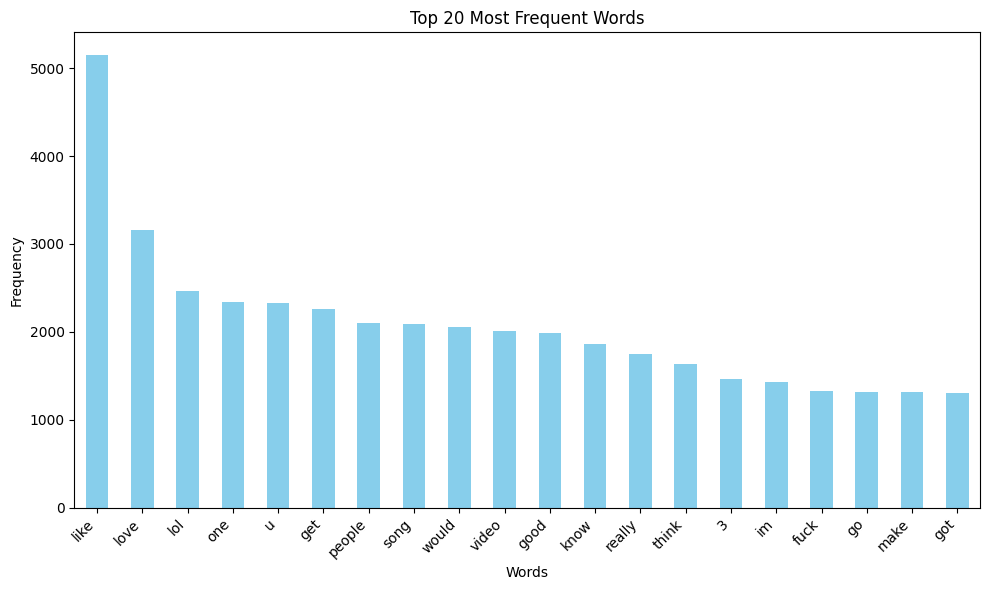

In [17]:
# Visualization of Word Frequency
plt.figure(figsize=(10, 6))
word_freq.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
# Topic Modeling using Latent Dirichlet Allocation (LDA)
# Convert text data to document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(dataset['Text'])



In [19]:
# Initialize LDA model
num_topics = 5  # Number of topics to extract
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
# Fit LDA model to the document-term matrix
lda_model.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [20]:
# Function to display topics and associated words
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

In [21]:
# Display the topics and associated words
num_top_words = 10
feature_names = vectorizer.get_feature_names_out()  # Retrieve feature names
print(f"\nTop {num_top_words} words for each topic:")
display_topics(lda_model, feature_names, num_top_words)


Top 10 words for each topic:
Topic 1:
love ur song good video amazing really ich die voice
Topic 2:
like just love lol song video know good im really
Topic 3:
que la en te el si es para se est
Topic 4:
people just like don know think god good way make
Topic 5:
like just watch make good fuck don video fucking shit


In [22]:

# Function to perform sentiment analysis on text data
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Get the sentiment polarity (-1 to 1)
    sentiment_polarity = analysis.sentiment.polarity
    # Return the sentiment polarity
    return sentiment_polarity

# Apply sentiment analysis to each text entry in the DataFrame
dataset['Sentiment_Polarity'] = dataset['Text'].apply(analyze_sentiment)

# Classify sentiment labels based on polarity values
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [23]:

# Apply sentiment label classification to each sentiment polarity
dataset['Sentiment_Label'] = dataset['Sentiment_Polarity'].apply(classify_sentiment)

# Display the DataFrame with sentiment analysis results
print(dataset[['Text', 'Sentiment_Polarity', 'Sentiment_Label']])



                                                   Text  Sentiment_Polarity  \
0     Does N.e.bodyelse Hear her Crazy ass Screamin ...           -0.040000   
1     There are so many things that are incorrect wi...           -0.110606   
2     3:26 hahah my boyfriend showed this song to me...            0.433333   
3     dick beyonce fuck y a ass hole you are truely ...           -0.186975   
4     DongHaeTaemin and Kai ;A; luhansehun and bacon...            0.482143   
...                                                 ...                 ...   
3459  She pretty I love this song I miss the old kel...            0.304464   
3460  Status-Online Im ZxkillergirlzX! I'm Zxkillerg...            0.000000   
3461  JR so cute EXO M Better I agree like yeah yeah...            0.370833   
3462                                                ! !            0.000000   
3463  great video and MERRY CHRISTMAS from greece :*...            0.332612   

     Sentiment_Label  
0           Negative  
1    

#### Finding the number of positive negative and neutral sentiments

In [24]:
# Count the occurrences of each sentiment label
sentiment_counts = dataset['Sentiment_Label'].value_counts()

# Print the counts of positive, neutral, and negative sentiments
print("Number of Positive Sentiments:", sentiment_counts.get('Positive', 0))
print("Number of Neutral Sentiments:", sentiment_counts.get('Neutral', 0))
print("Number of Negative Sentiments:", sentiment_counts.get('Negative', 0))

Number of Positive Sentiments: 2808
Number of Neutral Sentiments: 166
Number of Negative Sentiments: 490


In [25]:


# Classify sentiment labels based on polarity values
def classify_sentiment(polarity):
    if polarity >= 0:
        return 0  # Positive or Neutral sentiment
    else:
        return 1  # Negative sentiment

# Apply sentiment label classification to each sentiment polarity
dataset['Sentiment'] = dataset['Sentiment_Polarity'].apply(classify_sentiment)

# Display the DataFrame with sentiment analysis results and the new sentiment column
print(dataset[['Text', 'Sentiment_Polarity', 'Sentiment_Label', 'Sentiment']])

# Count the occurrences of each sentiment label
sentiment_counts = dataset['Sentiment'].value_counts()

# Print the counts of positive and negative sentiments
print("Number of Positive or Neutral Sentiments:", sentiment_counts.get(0, 0))
print("Number of Negative Sentiments:", sentiment_counts.get(1, 0))


                                                   Text  Sentiment_Polarity  \
0     Does N.e.bodyelse Hear her Crazy ass Screamin ...           -0.040000   
1     There are so many things that are incorrect wi...           -0.110606   
2     3:26 hahah my boyfriend showed this song to me...            0.433333   
3     dick beyonce fuck y a ass hole you are truely ...           -0.186975   
4     DongHaeTaemin and Kai ;A; luhansehun and bacon...            0.482143   
...                                                 ...                 ...   
3459  She pretty I love this song I miss the old kel...            0.304464   
3460  Status-Online Im ZxkillergirlzX! I'm Zxkillerg...            0.000000   
3461  JR so cute EXO M Better I agree like yeah yeah...            0.370833   
3462                                                ! !            0.000000   
3463  great video and MERRY CHRISTMAS from greece :*...            0.332612   

     Sentiment_Label  Sentiment  
0           Negat

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'dataset' is your DataFrame and 'Text' is the column containing text data
text_data = dataset['Text']

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data to TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

# Convert TF-IDF matrix to a DataFrame (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())




In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Preprocess the text data
# Assuming 'Text' is the column name containing text data
text_data = dataset['Text']

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fit and transform the text data to TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

# Apply NMF to discover topics
num_topics = 5  # Define the number of topics
nmf_model = NMF(n_components=num_topics, random_state=42)

# Fit NMF model to the TF-IDF matrix
nmf_model.fit(tfidf_matrix)

# Display the top words for each topic
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

num_top_words = 10  # Number of top words to display for each topic
print(f"\nTop {num_top_words} words for each topic:")
display_topics(nmf_model, tfidf_vectorizer.get_feature_names_out(), num_top_words)


Top 10 words for each topic:
Topic 1:
like just people don know video think fucking fuck really
Topic 2:
love song amazing omg voice cute good great beautiful really
Topic 3:
que la el es en se lo por los si
Topic 4:
lol ur xd im lmao dont like funny omg got
Topic 5:
ich ist das und die du der nicht ein es


In [28]:
# Display topics and identify relevant topics related to criminal behavior
num_top_words = 10  # Number of top words to display for each topic

print("Identifying topics related to criminal behavior:")
for topic_idx, topic in enumerate(nmf_model.components_):
    topic_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
    print(f"\nTopic {topic_idx + 1}:")
    print(" ".join(topic_words))

# Identify relevant topics related to criminal behavior based on the context of the words
relevant_topics = [0, 2]  # Assuming topics 0 and 2 are related to criminal behavior

# Inspect top words associated with relevant topics
print("\nTop words related to criminal behavior:")
for topic_idx in relevant_topics:
    topic_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in nmf_model.components_[topic_idx].argsort()[:-num_top_words - 1:-1]]
    print(f"\nTopic {topic_idx + 1}:")
    print(" ".join(topic_words))

Identifying topics related to criminal behavior:

Topic 1:
like just people don know video think fucking fuck really

Topic 2:
love song amazing omg voice cute good great beautiful really

Topic 3:
que la el es en se lo por los si

Topic 4:
lol ur xd im lmao dont like funny omg got

Topic 5:
ich ist das und die du der nicht ein es

Top words related to criminal behavior:

Topic 1:
like just people don know video think fucking fuck really

Topic 3:
que la el es en se lo por los si


In [29]:
# Define a list of cursed words
cursed_words = ['fuck', 'shit', 'asshole', 'bitch', 'damn', 'crap', 'hell', 'bastard', 'piss', 'dick','pussy', 'mf','mother fucker', 'behenchod']

# Function to count cursed words in a text
def count_cursed_words(text):
    count = 0
    for word in text.split():
        if word.lower() in cursed_words:
            count += 1
    return count

# Add a new column for the number of cursed words
dataset['No_of_Cursed_Words'] = dataset['Text'].apply(count_cursed_words)

# Display the updated DataFrame with the new column
print(dataset.columns)
print(dataset.describe())


Index(['index', 'UserIndex', 'Text', 'Number of Comments',
       'Number of Subscribers', 'Membership Duration', 'Number of Uploads',
       'Profanity in UserID', 'Age', 'oh_label', 'stemmed_content',
       'processed_text', 'Sentiment_Polarity', 'Sentiment_Label', 'Sentiment',
       'No_of_Cursed_Words'],
      dtype='object')
             index  Number of Comments  Number of Subscribers  \
count  3464.000000         3464.000000            3464.000000   
mean   1733.021651           15.452367             304.318995   
std    1001.844201           10.862517           15520.532319   
min       0.000000            1.000000               0.000000   
25%     865.750000            6.000000               0.000000   
50%    1731.500000           14.000000               2.000000   
75%    2601.250000           23.000000               7.000000   
max    3468.000000           50.000000          912377.000000   

       Membership Duration  Number of Uploads  Profanity in UserID  \
count     

In [30]:
dataset['No_of_Cursed_Words'].value_counts()

No_of_Cursed_Words
0     2056
1      604
2      295
3      173
4      111
5       93
6       41
7       27
8       20
9       15
10       7
11       6
13       4
14       3
12       3
21       1
22       1
25       1
18       1
27       1
17       1
Name: count, dtype: int64

In [31]:
from spellchecker import SpellChecker
import emoji

# Initialize spell checker
spell = SpellChecker()

# Function to correct spelling errors in text
def correct_spelling(text):
    corrected_text = []
    # Split text into words and check spelling
    for word in text.split():
        corrected_word = spell.correction(word)
        corrected_text.append(corrected_word)
    return " ".join(corrected_text)

# Function to handle emojis in text
def handle_emojis(text):
    # Replace emojis with their textual representation
    text_with_emojis = emoji.demojize(text)
    return text_with_emojis

# Apply spelling correction and emoji handling to the 'Text' column
dataset['Text'] = dataset['Text'].apply(correct_spelling)
dataset['Text'] = dataset['Text'].apply(handle_emojis)

# Display the updated dataset
print(dataset.head())


ModuleNotFoundError: No module named 'indexer'

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'dataset' is your DataFrame and 'Text' is the column containing text data
text_data = dataset['Text']

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data to TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

# Convert TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the TF-IDF DataFrame with the original dataset
dataset_with_tfidf = pd.concat([dataset, tfidf_df], axis=1)

# Display the dataset with TF-IDF scores
print(dataset_with_tfidf.head())


   index UserIndex                                               Text  \
0      0        X1  Does N.e.bodyelse Hear her Crazy ass Screamin ...   
1      1        X2  There are so many things that are incorrect wi...   
2      2        X3  3:26 hahah my boyfriend showed this song to me...   
3      3     X2218  dick beyonce fuck y a ass hole you are truely ...   
4      4        X5  DongHaeTaemin and Kai ;A; luhansehun and bacon...   

   Number of Comments  Number of Subscribers  Membership Duration  \
0                  10                      1                    3   
1                   3                      0                    6   
2                   7                      0                    3   
3                  34                      0                    3   
4                  11                    173                    5   

   Number of Uploads  Profanity in UserID  Age  oh_label  ...   zy zyan  \
0                  3                    0   15         0  ...  0.0  0.0

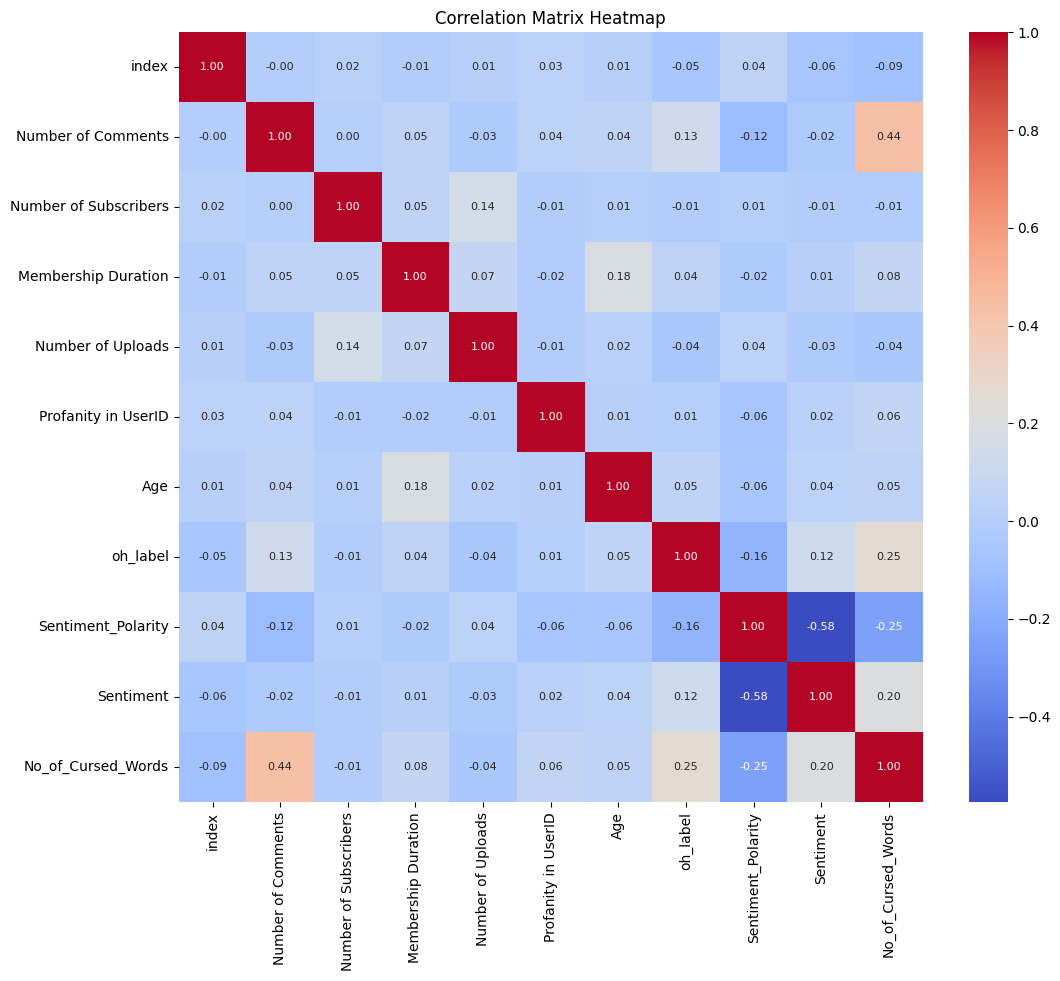

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove columns containing non-numeric values
numeric_df = dataset.select_dtypes(include='number')

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation Matrix Heatmap')
plt.show()


In [34]:
dataset['oh_label'].value_counts()

oh_label
0    3047
1     417
Name: count, dtype: int64

oh_label helps us to vclassify that if the comment is negative or positive.

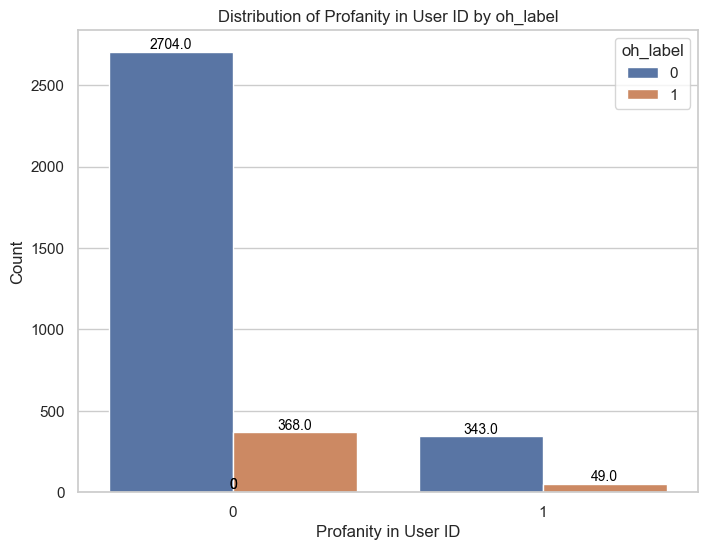

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the seaborn plots

sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Profanity in UserID', hue='oh_label', data=dataset)

# Add text annotations above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Profanity in User ID by oh_label')
plt.xlabel('Profanity in User ID')
plt.ylabel('Count')
plt.legend(title='oh_label', loc='upper right')
plt.show()


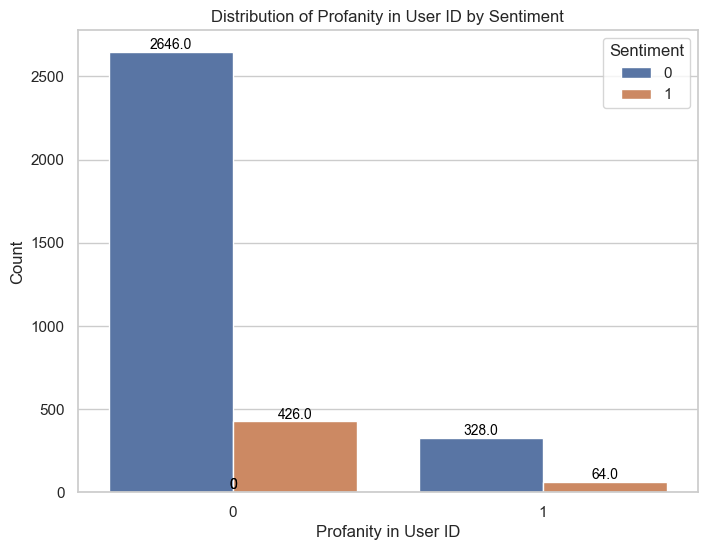

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the seaborn plots
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Profanity in UserID', hue='Sentiment', data=dataset)

# Add text annotations above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Profanity in User ID by Sentiment')
plt.xlabel('Profanity in User ID')
plt.ylabel('Count')
plt.legend(title='Sentiment', loc='upper right')
plt.show()


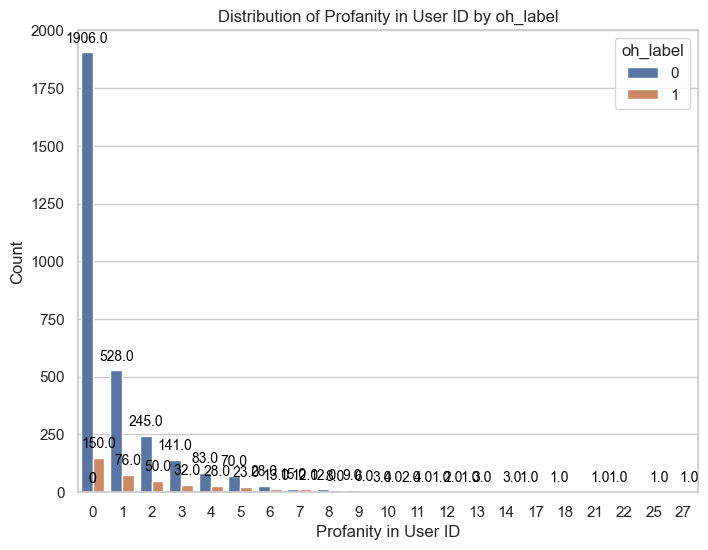

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the seaborn plots
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='No_of_Cursed_Words', hue='oh_label', data=dataset)

# Add text annotations above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.title('Distribution of Profanity in User ID by oh_label')
plt.xlabel('Profanity in User ID')
plt.ylabel('Count')
plt.legend(title='oh_label', loc='upper right')
plt.show()

In [38]:
dataset.columns

Index(['index', 'UserIndex', 'Text', 'Number of Comments',
       'Number of Subscribers', 'Membership Duration', 'Number of Uploads',
       'Profanity in UserID', 'Age', 'oh_label', 'stemmed_content',
       'processed_text', 'Sentiment_Polarity', 'Sentiment_Label', 'Sentiment',
       'No_of_Cursed_Words'],
      dtype='object')

In [39]:
# Get the data types of each column in the dataset
column_data_types = dataset.dtypes

# Identify numerical columns (those with numeric data types)
numerical_columns = column_data_types[column_data_types != 'object'].index.tolist()

# Remove the target variable ('oh_label') from numerical_columns if needed
if 'oh_label' in numerical_columns:
    numerical_columns.remove('oh_label')

print("Numerical columns:", numerical_columns)


Numerical columns: ['index', 'Number of Comments', 'Number of Subscribers', 'Membership Duration', 'Number of Uploads', 'Profanity in UserID', 'Age', 'Sentiment_Polarity', 'Sentiment', 'No_of_Cursed_Words']


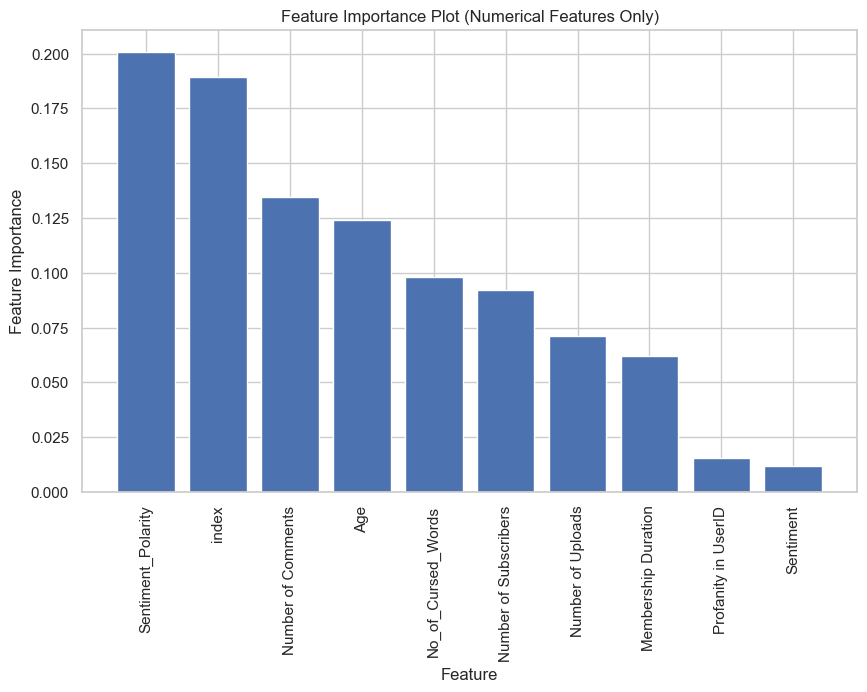

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming 'oh_label' is the target variable and 'numerical_columns' contains the numerical features
X = dataset[numerical_columns]  # Select only numerical features
y = dataset['oh_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier using only numerical features
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Sort feature importances in descending order

sorted_indices = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importance Plot (Numerical Features Only)")
plt.show()


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [42]:
    # Feature Selection
    numerical_columns = numeric_df.columns.tolist()
    if 'oh_label' in numerical_columns:
        numerical_columns.remove('oh_label')
    print("\nNumerical columns after feature selection:", numerical_columns)



Numerical columns after feature selection: ['index', 'Number of Comments', 'Number of Subscribers', 'Membership Duration', 'Number of Uploads', 'Profanity in UserID', 'Age', 'Sentiment_Polarity', 'Sentiment', 'No_of_Cursed_Words']


In [43]:
# Assuming 'oh_label' is the target variable and 'Profanity in User ID' is a feature
X = dataset[ numerical_columns]
y = dataset['oh_label']



In [44]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)




In [45]:
# Train logistic regression model
logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(X_train, y_train)


c:\Users\Dhruv Sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
# Predict on the testing data for logistic regression
y_pred_lr = logistic_regression_model.predict(X_test)


In [47]:
# Evaluate the performance of logistic regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))



Logistic Regression Accuracy: 0.8816738816738817
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       610
           1       0.60      0.04      0.07        83

    accuracy                           0.88       693
   macro avg       0.74      0.52      0.50       693
weighted avg       0.85      0.88      0.83       693



In [48]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

# Define logistic regression model with class weights
logistic_regression_model = LogisticRegression(class_weight='balanced')

# Define hyperparameters for grid search
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=logistic_regression_model, param_grid=params, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_lr_model = grid_search.best_estimator_

# Train the best logistic regression model on the entire training data
best_lr_model.fit(X_train, y_train)

# Predict probabilities on the testing data
y_pred_proba_lr = best_lr_model.predict_proba(X_test)[:, 1]

# Predictions based on probability threshold of 0.5
y_pred_lr = best_lr_model.predict(X_test)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_proba_lr)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_lr)

print("AUC Score:", auc_score)
print("F1 Score:", f1)


c:\Users\Dhruv Sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Dhruv Sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

AUC Score: 0.7278688524590164
F1 Score: 0.36486486486486486


c:\Users\Dhruv Sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Dhruv Sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [49]:
from sklearn.metrics import classification_report

# Calculate classification report
report = classification_report(y_test, y_pred_lr)

# Print the report
print("Classification Report:")
print(report)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_proba_lr)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_lr)

print("\nAUC Score:", auc_score)
print("F1 Score:", f1)


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       610
           1       0.25      0.65      0.36        83

    accuracy                           0.73       693
   macro avg       0.60      0.69      0.60       693
weighted avg       0.86      0.73      0.77       693


AUC Score: 0.7278688524590164
F1 Score: 0.36486486486486486


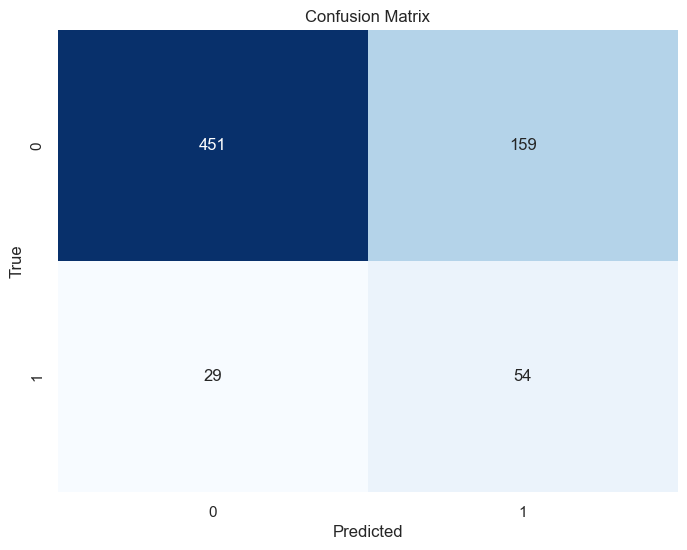

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [51]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
import numpy as np

def train_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test):
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=5)
    grid_search.fit(X_train, y_train)
    
    # Get the best model from grid search
    best_model = grid_search.best_estimator_
    
    # Train the best model on the entire training data
    best_model.fit(X_train, y_train)
    
    # Predict probabilities on the testing data
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    
    # Predictions based on probability threshold of 0.5
    y_pred = best_model.predict(X_test)
    
    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    
    # Print AUC and F1 scores
    print("Model:", type(model).__name__)
    print("AUC Score:", auc_score)
    print("F1 Score:", f1)
    
    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    return best_model, auc_score, f1, cm

# Define models to compare
models = [
    LogisticRegression(class_weight='balanced'), 
    RandomForestClassifier(class_weight='balanced', random_state=42), 
    SVC(class_weight='balanced', probability=True)
]

# Define hyperparameters for grid search for each model
param_grids = [
    {'C': [0.001, 0.01, 0.1, 1, 10, 100]},  # Logistic Regression
    {'n_estimators': [50, 100, 200]},  # Random Forest
    {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}  # Support Vector Machine
]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

# Train and evaluate each model
results = []
for model, param_grid in zip(models, param_grids):
    print("="*50)
    result = train_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test)
    results.append(result)
    print("="*50)

# Compare models based on AUC score
best_model_idx = np.argmax([result[1] for result in results])
best_model = results[best_model_idx][0]
best_auc_score = results[best_model_idx][1]
print("Best Model based on AUC Score:", type(best_model).__name__)
print("Best AUC Score:", best_auc_score)


c:\Users\Dhruv Sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Dhruv Sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Model: LogisticRegression
AUC Score: 0.7278688524590164
F1 Score: 0.36486486486486486
Confusion Matrix:
[[451 159]
 [ 29  54]]
Model: RandomForestClassifier
AUC Score: 0.6653565079992099
F1 Score: 0.044444444444444446
Confusion Matrix:
[[605   5]
 [ 81   2]]
Model: SVC
AUC Score: 0.49552636776614656
F1 Score: 0.2139175257731959
Confusion Matrix:
[[  0 610]
 [  0  83]]
Best Model based on AUC Score: LogisticRegression
Best AUC Score: 0.7278688524590164
